**Data Science - DS, Artificial Intelligence - AI, Machine Learning**
* Data science is the process of extracting knowledge from data. This can be done through a variety of techniques, including data mining, machine learning, and natural language processing.
* AI is a process where computers are taught to think for themselves. This can be done through a variety of techniques, including machine learning, deep learning, and natural language processing.

check: https://beta.openai.com/examples/default-factual-answering
(for coders e.g. https://beta.openai.com/playground/p/default-fix-python-bugs?model=code-davinci-002 )

Presentation here:
https://nordlichtit-my.sharepoint.com/:p:/g/personal/marek_skokan_nordlicht-it_com/ETDszME-CQROrvlDguvUi4MBhJYiCy09Bh_fUEPX7Wdr7g?e=TQkixk

***Machine Learning***

Machine learning is a process where computers are taught to learn from data, without being explicitly programmed. This is done through a process of iteration, where the computer is given a set of data and then asked to find patterns in that data. It then uses those patterns to make predictions about future data.

**Classification - Decision function**
* Classification is a process where a computer is taught to identify patterns in data and group them into categories. This can be used, for example, to identify different types of animals by their characteristics.
* A decision function is a mathematical function that takes in input data and outputs a decision. This function can be used to determine, for example, whether or not to accept or reject a loan application.

Example : https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py


**Classifier comparison**

https://hub.mybinder.turing.ac.uk/user/scikit-learn-scikit-learn-gf5j8u0a/lab/tree/notebooks/auto_examples/classification/plot_classifier_comparison.ipynb

A comparison of a several classifiers in scikit-learn on synthetic datasets. The point of this example is to illustrate the nature of decision boundaries of different classifiers. This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated linearly and the simplicity of classifiers such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


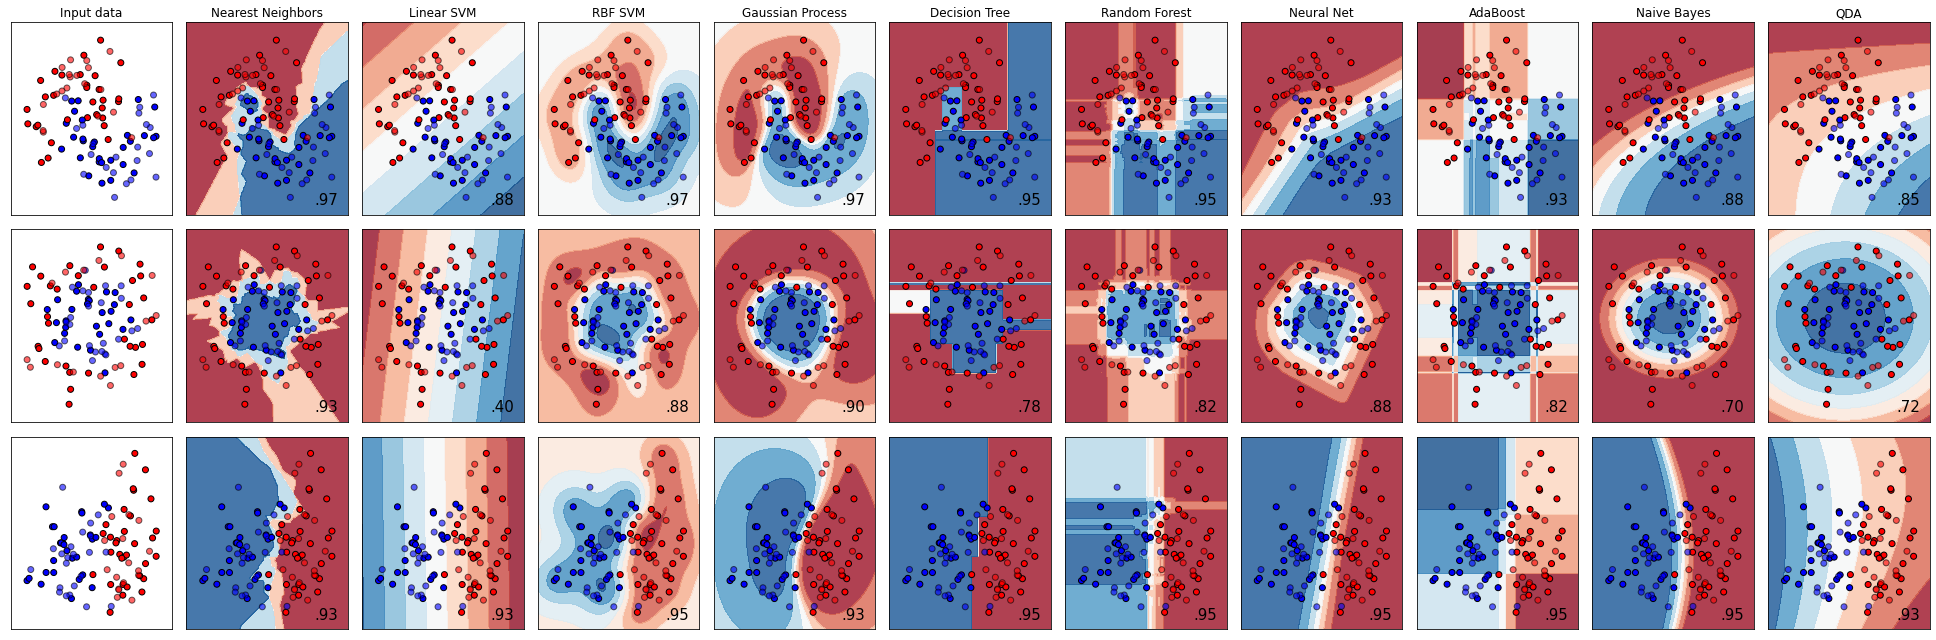

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs


In [6]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# Modified for documentation / link to documentaion by Marek Skokan
# License: BSD 3 clause

###############################################################
# libraries 5 mins
###############################################################
import numpy as np #manipulacia s datami - polia - jednoducho mat operacie/ matice
import pandas as pd #manipulacia s datami - dataframes - jednoducho charakteristiky, spajanie, agragacia, nacitavanie / ukladanie
import matplotlib.pyplot as plt # graficke zobraozvanie / vizualizacia
from matplotlib.colors import ListedColormap #farebna skala
from sklearn.model_selection import train_test_split #delba dat na tranovacia a testovacie
from sklearn.preprocessing import StandardScaler # skalovane je pre niektore modely nutne
from sklearn.datasets import make_moons, make_circles, make_classification # synteticke data
from sklearn.neural_network import MLPClassifier ## neuronova siet pre klasifickaciu
from sklearn.neighbors import KNeighborsClassifier # K najblizzsich susedov
from sklearn.svm import SVC # support vektor machine
from sklearn.gaussian_process import GaussianProcessClassifier 
from sklearn.gaussian_process.kernels import RBF # support vektor machine s "jadrovou funkciou" - 'ako kombinovat vstupne premenne' a vybehnut do nelin. priestoru
from sklearn.tree import DecisionTreeClassifier #jednoduchuy rozhodovaci strom
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier # ensemble - kombinacia jednoduchych klasifikatorov ucenych na "podmnozinach dat"
from sklearn.naive_bayes import GaussianNB 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh
%time

###############################################################
# Clasifiers 2 mins
###############################################################

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM", #https://towardsdatascience.com/svm-classifier-and-rbf-kernel-how-to-make-better-models-in-python-73bb4914af5b
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]
###############################################################
# specification of hyperparameters
###############################################################
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=4, n_estimators=200, max_features=1, n_jobs=-1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]
###############################################################
# DATASET generation
#  block 1. no much to say 9pictures below) - 1 min
###############################################################
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)                ###############################################################
    X_train, X_test, y_train, y_test = train_test_split( ## delba dat z uciacej mnoziny an trenocaciu a testovaciu podmnozinu
        X, y, test_size=0.4, random_state=42             ###############################################################
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    ###############################################################
    # some basic insight into classifiers - time cca 7-10 mins -
    # iterate over classifiers and training process per each
    ###############################################################
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)         ## ucenie. 'fit'
        score = clf.score(X_test, y_test) ## skorovanie
        ###############################################################
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        ###############################################################
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
        ###############################################################
        # Plot the training points
        ###############################################################
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()
%time

In [70]:
# confusion matrix evaluation on testing set + tuning alpha
#X_train, X_test, y_train, y_test
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


clf = MLPClassifier(alpha=0.01, early_stopping=True,
                                hidden_layer_sizes=[10, 10], max_iter=1000,
                                random_state=1, solver='lbfgs')
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13  3]
 [ 3 21]]
0.85
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.88      0.88      0.88        24

    accuracy                           0.85        40
   macro avg       0.84      0.84      0.84        40
weighted avg       0.85      0.85      0.85        40



In [69]:
# confusion matrix evaluation on training set
y_pred=clf.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

[[30  4]
 [ 3 23]]
0.8833333333333333
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        34
           1       0.85      0.88      0.87        26

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



**What is hyperparameters tuning?**

Hyperparameters tuning is a process where the parameters of a machine learning algorithm are tuned to produce the best possible results. This can be done by trial and error, or by using a technique called grid search.

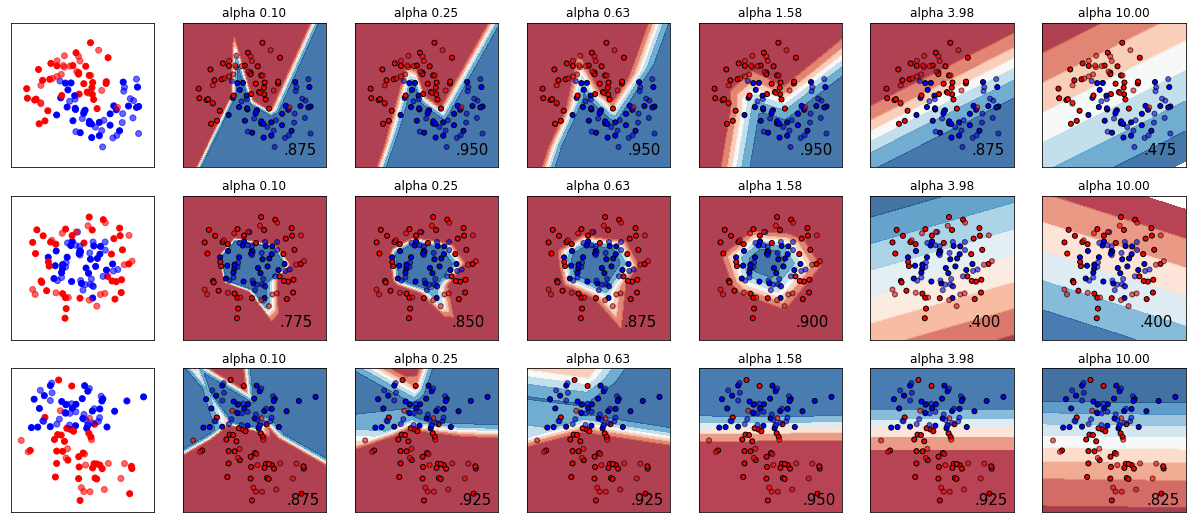

In [47]:
# Author: Issam H. Laradji
# adjusted and commented: Marek Skokan
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

h = 0.02  # step size in the mesh

alphas = np.logspace(-1, 1, 6) # regulation parameter - bigger number produce more linear model, lower non-linear model

classifiers = []
names = [ ]
        #############################################################################
        # iterate over values regulation hyperparametersparameters and create 
        #############################################################################
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
###############################################################
# DATASET generation
#  block 1. no much to say 9pictures below) - 1 min
###############################################################
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(17, 9))
i = 1
###############################################################
# iterate over datasets
# Training
###############################################################

for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot also the training points
        ax.scatter(
            X_train[:, 0],
            X_train[:, 1],
            c=y_train,
            cmap=cm_bright,
            edgecolors="black",
            s=25,
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            alpha=0.6,
            edgecolors="black",
            s=25,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            f"{score:.3f}".lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()

In [9]:
alphas

array([ 0.1       ,  0.25118864,  0.63095734,  1.58489319,  3.98107171,
       10.        ])

In [10]:
classifiers

[Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('mlpclassifier',
                  MLPClassifier(alpha=0.1, early_stopping=True,
                                hidden_layer_sizes=[10, 10], max_iter=2000,
                                random_state=1, solver='lbfgs'))]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('mlpclassifier',
                  MLPClassifier(alpha=0.251188643150958, early_stopping=True,
                                hidden_layer_sizes=[10, 10], max_iter=2000,
                                random_state=1, solver='lbfgs'))]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('mlpclassifier',
                  MLPClassifier(alpha=0.6309573444801934, early_stopping=True,
                                hidden_layer_sizes=[10, 10], max_iter=2000,
                                random_state=1, solver='lbfgs'))]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('mlp

**Prediction**

Prediction is a process where a computer is asked to make predictions about future data. This can be used, for example, to predict the outcome of a football match.

<Figure size 1296x1296 with 0 Axes>

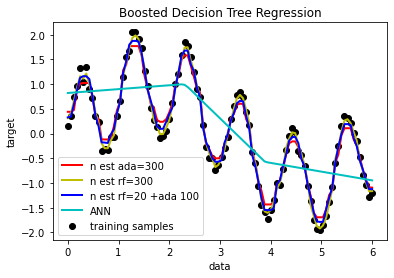

<Figure size 1296x1296 with 0 Axes>

In [21]:
"""
================================================
Decision Tree Regression with AdaBoost and MLPR
================================================

A decision tree is boosted using the AdaBoost.R2 [1]_ algorithm on a 1D
sinusoidal dataset with a small amount of Gaussian noise.
299 boosts (300 decision trees) is compared with a single decision tree
regressor. As the number of boosts is increased the regressor can fit more
detail.

..  note, evaluation below is just for overview purpose and it is not correct from methodol. point of view.


.. [1] H. Drucker, "Improving Regressors using Boosting Techniques", 1997.
..  M. Skokan, adding MLPR and evaluation


"""

# Author: Noel Dawe <noel.dawe@gmail.com>
# extended and commented M. Skokan
#
# License: BSD 3 clause

# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor


# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_3 = RandomForestRegressor(
    max_depth=8, n_estimators=300, random_state=rng, n_jobs=-1
)
# ADA boost. with RF basis model 
regr_4 = AdaBoostRegressor(RandomForestRegressor(
    max_depth=5, n_estimators=10, random_state=rng, n_jobs=-1), n_estimators=300, random_state=rng
)
# scaler needed
regr_5 =     MLPRegressor(
        hidden_layer_sizes=(50, 30),
        learning_rate_init=0.1,
        early_stopping=True,
        random_state=rng
    )


regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)
regr_4.fit(X, y)
regr_5.fit(X, y)



# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
y_3 = regr_3.predict(X)
y_4 = regr_4.predict(X)
y_5 = regr_5.predict(X)



# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
#plt.plot(X, y_1, c="g", label="sinmple tree=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n est ada=300", linewidth=2)
plt.plot(X, y_3, c="y", label="n est rf=300", linewidth=2)
plt.plot(X, y_4, c="b", label="n est rf=20 +ada 100", linewidth=2)
plt.plot(X, y_5, c="c", label="ANN", linewidth=2)


plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.figure(figsize=(18, 18))
#plt.show()



<AxesSubplot:ylabel='Count'>

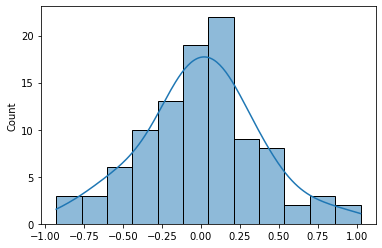

In [22]:
import seaborn as sns

%matplotlib inline
sns.histplot(y - y_1,kde = True)

<AxesSubplot:ylabel='Count'>

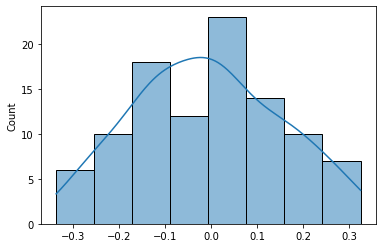

In [23]:
sns.histplot(y - y_2,kde = True)

<AxesSubplot:ylabel='Count'>

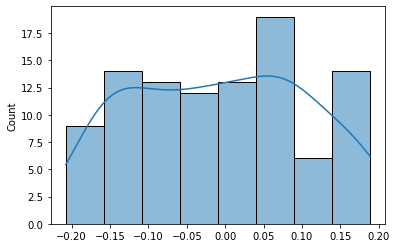

In [24]:
sns.histplot(y - y_4,kde = True)

<AxesSubplot:ylabel='Count'>

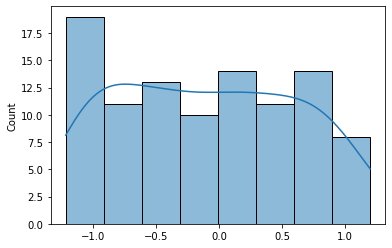

In [25]:
sns.histplot(y - y_5,kde = True)

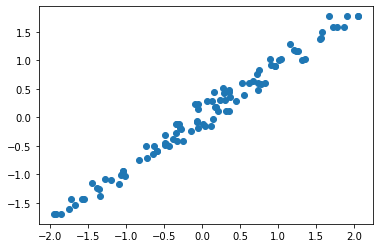

In [26]:
plt.scatter(y,y_2) 

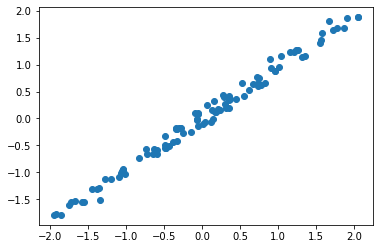

In [33]:
plt.scatter(y,y_4) 

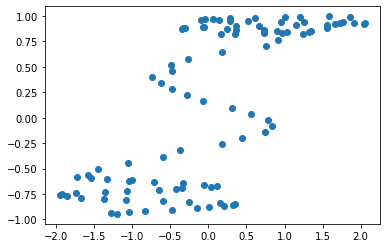

In [32]:
plt.scatter(y,y_5) 

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('MAE is:',mean_absolute_error(y,y_2))
print('MSE is:',mean_squared_error(y,y_2))
print('RMSE is:',np.sqrt(mean_squared_error(y,y_2)))

MAE is: 0.12777549091470466
MSE is: 0.024815067745362372
RMSE is: 0.15752799035524567


In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('MAE is:',mean_absolute_error(y,y_4))
print('MSE is:',mean_squared_error(y,y_4))
print('RMSE is:',np.sqrt(mean_squared_error(y,y_4)))

MAE is: 0.09640435367103085
MSE is: 0.012554452177927071
RMSE is: 0.11204665179257732


In [31]:
print('MAE is:',mean_absolute_error(y,y_5))
print('MSE is:',mean_squared_error(y,y_5))
print('RMSE is:',np.sqrt(mean_squared_error(y,y_5)))

MAE is: 0.6208893302060524
MSE is: 0.511463927254758
RMSE is: 0.7151670624789414
